In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from pathlib import Path
import pandas as pd

FULL_NAME = "hh_vacancies_clean_full.parquet"
SALARY_NAME = "hh_vacancies_salary_model.parquet"

DRIVE_DIR = Path("/content/drive/MyDrive/ColabNotebooks/FinalProject/ProcessedDatasets")

full_path = DRIVE_DIR / FULL_NAME
salary_path = DRIVE_DIR / SALARY_NAME

if full_path.exists() and salary_path.exists():
    df = pd.read_parquet(full_path)
    df_salary = pd.read_parquet(salary_path)

else:
    from google.colab import files
    uploaded = files.upload()
    df = pd.read_parquet(FULL_NAME)
    df_salary = pd.read_parquet(SALARY_NAME)


In [4]:
print("Размер df:", df.shape)
print("Размер df_salary:", df_salary.shape)

Размер df: (21709, 27)
Размер df_salary: (14131, 30)


In [5]:
print("=== df ===")
df.info()

print("\n=== df_salary ===")
df_salary.info()


=== df ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21709 entries, 0 to 21708
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype                                
---  ------                  --------------  -----                                
 0   id                      21709 non-null  object                               
 1   published_at            21709 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   name                    21709 non-null  object                               
 3   area_id                 21709 non-null  int64                                
 4   area_name               21709 non-null  object                               
 5   employer_id             21503 non-null  float64                              
 6   employer_name           21709 non-null  object                               
 7   salary_from             13828 non-null  float64                              
 8   salary_to               9070 non-null   float

In [6]:
print("=== Пропуски df ===")
missing_df = df.isna().sum().sort_values(ascending=False)
print(missing_df[missing_df > 0])

print("\n=== Пропуски df_salary ===")
missing_salary = df_salary.isna().sum().sort_values(ascending=False)
print(missing_salary[missing_salary > 0])


=== Пропуски df ===
salary_to           12639
key_skills           8944
salary_from          7881
salary_currency      6622
salary_was_gross     6622
salary_mid           6622
employer_id           206
dtype: int64

=== Пропуски df_salary ===
salary_to      5681
key_skills     5447
salary_from    1159
employer_id      71
dtype: int64


In [7]:
print("Дубликаты в df:", df.duplicated().sum())
print("Дубликаты в df_salary:", df_salary.duplicated().sum())

Дубликаты в df: 0
Дубликаты в df_salary: 0


In [8]:
salary_with_value = df[df["salary_mid"].notna()]

salary_with_value["salary_currency"].value_counts()

,count
salary_currency,
RUR,14899
USD,161
EUR,21
BYR,3
KZT,2
KGS,1


In [9]:
non_rub = salary_with_value[
    ~salary_with_value["salary_currency"].isin(["RUR", "RUB"])
]

print("Нерублевых вакансий:", len(non_rub))
print("Доля:", len(non_rub) / len(salary_with_value))


Нерублевых вакансий: 188
Доля: 0.012461059190031152


In [10]:
total = len(df)
with_salary = len(df_salary)
without_salary = total - with_salary

print("Всего вакансий:", total)
print("С зарплатой:", with_salary)
print("Без зарплаты:", without_salary)

print("\nДоля вакансий без зарплаты:",
      round(without_salary / total * 100, 2), "%")


Всего вакансий: 21709
С зарплатой: 14131
Без зарплаты: 7578

Доля вакансий без зарплаты: 34.91 %


In [11]:
df_salary['salary_mid'].describe()

,salary_mid
count,14131.000000
mean,128422.778002
std,69322.082901
min,30000.000000
25%,80000.000000
50%,110000.000000
75%,152250.000000
max,500000.000000


In [12]:
df_salary['salary_mid'].quantile([0.9, 0.95, 0.99])


,salary_mid
0.90,217500.0
0.95,261000.0
0.99,391500.0


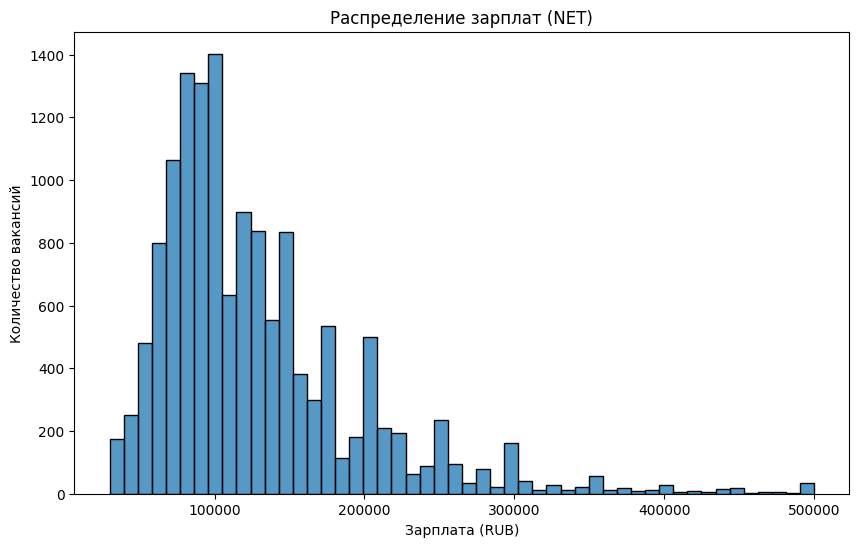

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(df_salary['salary_mid'], bins=50)
plt.title("Распределение зарплат (NET)")
plt.xlabel("Зарплата (RUB)")
plt.ylabel("Количество вакансий")
plt.show()


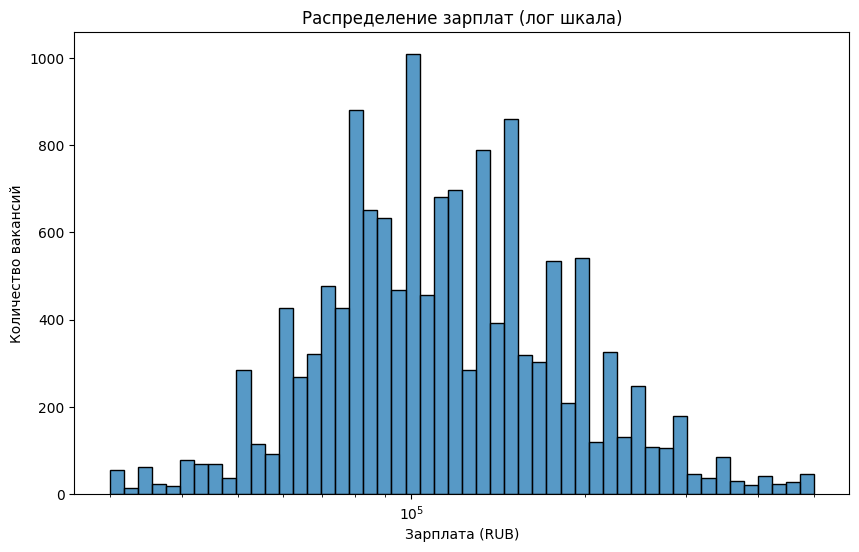

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(df_salary['salary_mid'], bins=50, log_scale=True)
plt.title("Распределение зарплат (лог шкала)")
plt.xlabel("Зарплата (RUB)")
plt.ylabel("Количество вакансий")
plt.show()


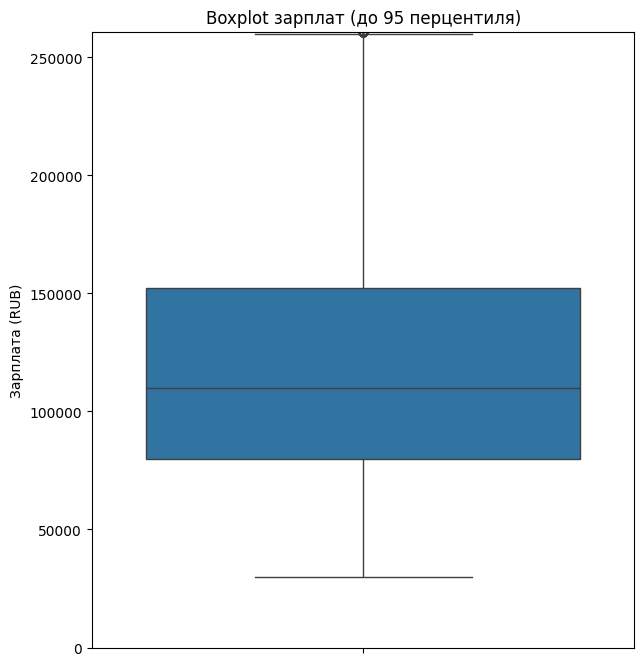

In [15]:
plt.figure(figsize=(7,8))
sns.boxplot(y=df_salary['salary_mid'])
plt.ylim(0, df_salary['salary_mid'].quantile(0.95))
plt.title("Boxplot зарплат (до 95 перцентиля)")
plt.ylabel("Зарплата (RUB)")
plt.show()


In [16]:
df_salary['experience'].value_counts()


,count
experience,
between1And3,7040
noExperience,3601
between3And6,2947
moreThan6,543


In [17]:
df_salary.groupby('experience')['salary_mid'].median().sort_values()

,salary_mid
experience,
noExperience,84825.0
between1And3,104400.0
between3And6,150000.0
moreThan6,200000.0


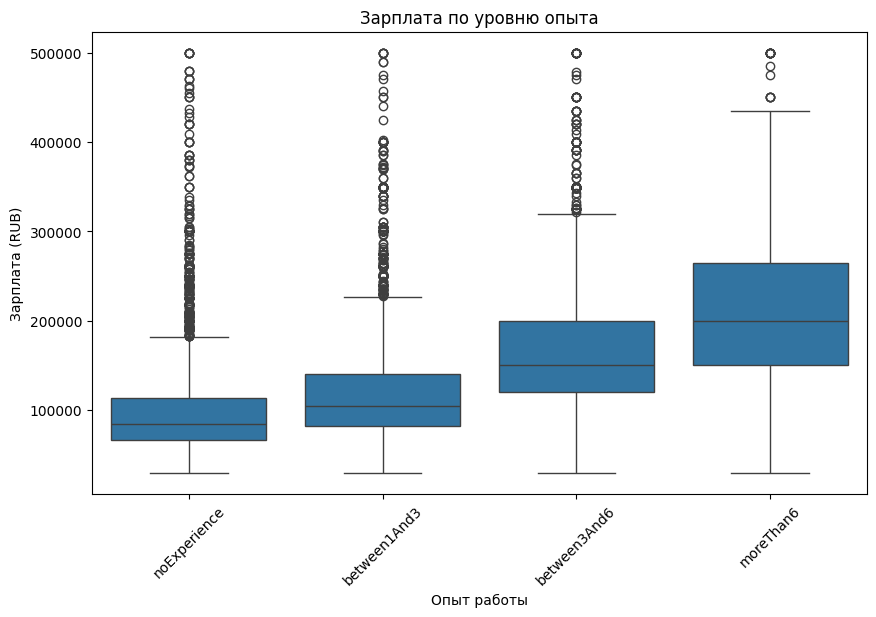

In [18]:
order_exp = [
    'noExperience',
    'between1And3',
    'between3And6',
    'moreThan6'
]

plt.figure(figsize=(10,6))

sns.boxplot(
    data=df_salary,
    x='experience',
    y='salary_mid',
    order=order_exp)

plt.xticks(rotation=45)
plt.title("Зарплата по уровню опыта")
plt.xlabel("Опыт работы")
plt.ylabel("Зарплата (RUB)")
plt.show()


Анализ распределения заработной платы по уровню опыта демонстрирует устойчивую тенденцию роста медианного дохода с увеличением стажа работы. При этом распределения частично перекрываются: в группе вакансий без опыта встречаются предложения с уровнем оплаты, сопоставимым с вакансиями для специалистов с опытом более 6 лет. Кроме того, с ростом опыта увеличивается вариативность заработной платы и межквартильный размах, что отражает расширение спектра позиций и уровней ответственности среди более опытных специалистов.

In [19]:
df_salary['employment'].value_counts()

,count
employment,
full,13141
part,886
project,104


In [20]:
df_salary.groupby('employment')['salary_mid'].median().sort_values()

,salary_mid
employment,
part,78300.0
full,110000.0
project,131805.0


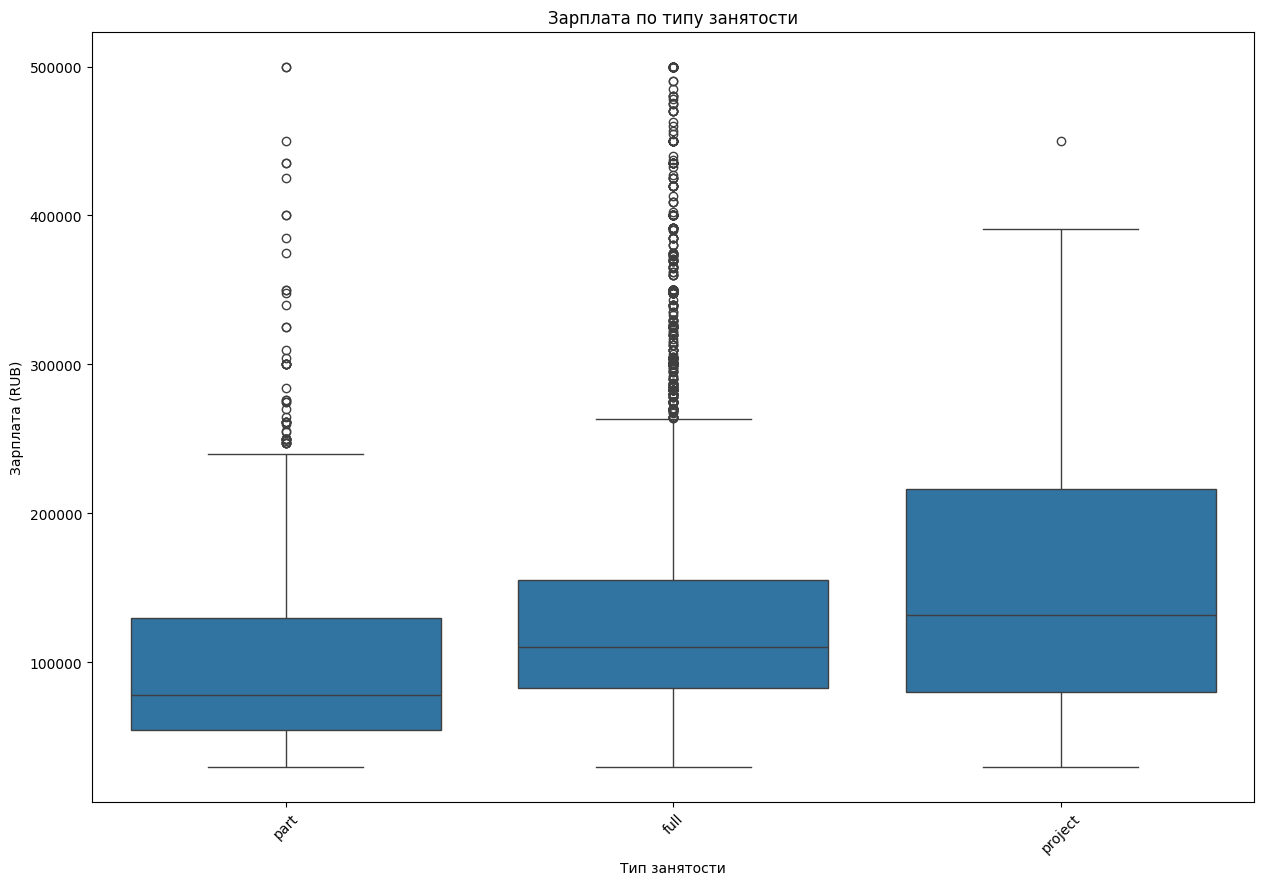

In [21]:
plt.figure(figsize=(15,10))

sns.boxplot(
    data=df_salary,
    x='employment',
    y='salary_mid',
    order=['part', 'full', 'project']
)

plt.xticks(rotation=45)
plt.title("Зарплата по типу занятости")
plt.xlabel("Тип занятости")
plt.ylabel("Зарплата (RUB)")
plt.show()

Наиболее высокая медианная зарплата наблюдается в проектной занятости (131,8 тыс. руб.), однако выборка таких вакансий невелика.
Полная занятость характеризуется медианой 110 тыс. руб., а частичная — 78,3 тыс. руб., что отражает экономическую логику различий в формате занятости.

In [22]:
df_salary['schedule'].value_counts()

,count
schedule,
fullDay,9103
remote,1881
shift,1454
flexible,1359
flyInFlyOut,334


In [23]:
df_salary.groupby('schedule')['salary_mid'].median().sort_values()

,salary_mid
schedule,
shift,87000.0
flexible,100000.0
remote,105000.0
fullDay,117000.0
flyInFlyOut,189250.0


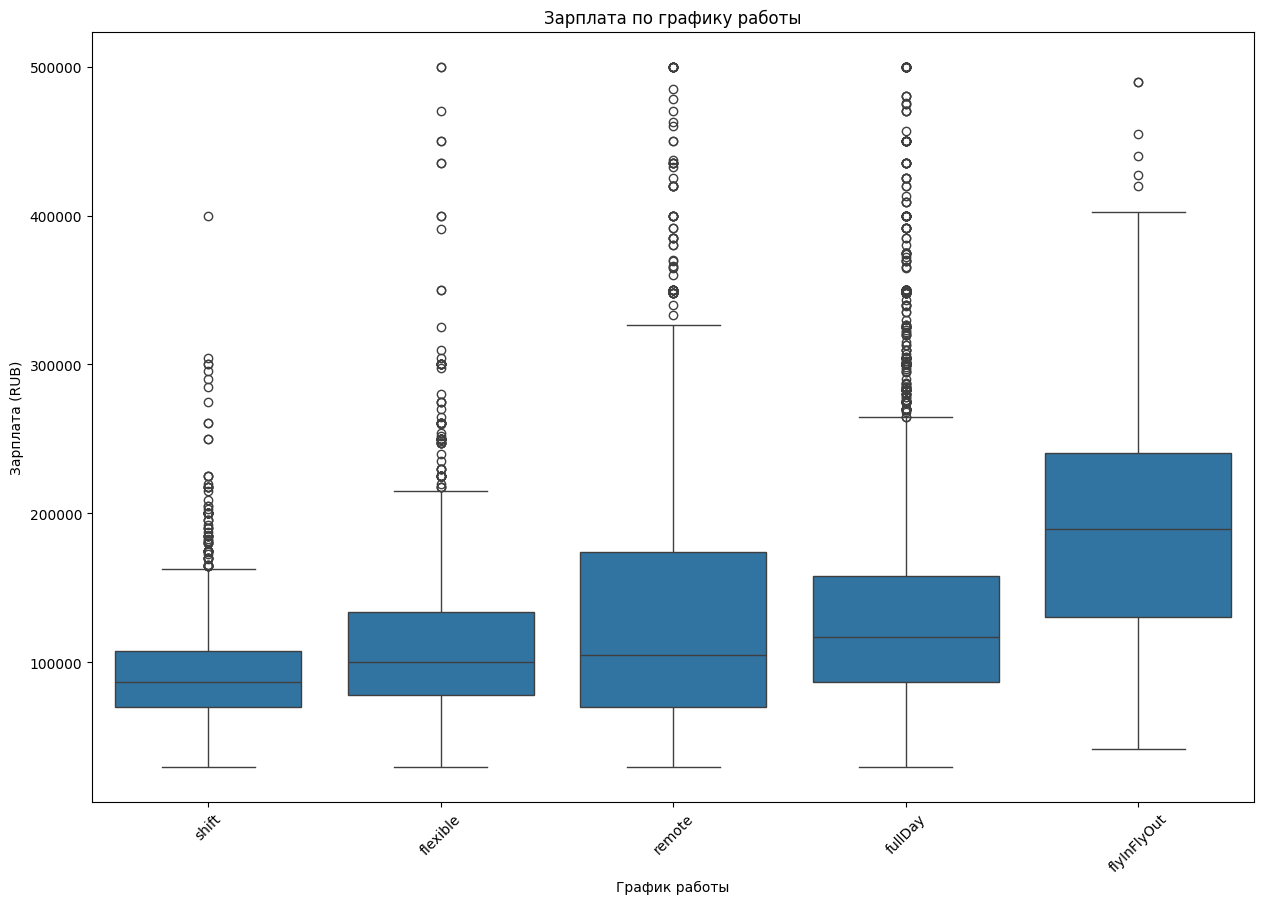

In [24]:
plt.figure(figsize=(15,10))

sns.boxplot(
    data=df_salary,
    x='schedule',
    y='salary_mid',
    order=['shift', 'flexible', 'remote', 'fullDay', 'flyInFlyOut']
)

plt.xticks(rotation=45)
plt.title("Зарплата по графику работы")
plt.xlabel("График работы")
plt.ylabel("Зарплата (RUB)")
plt.show()


Наиболее высокий уровень оплаты наблюдается при вахтовом методе работы (flyInFlyOut), медианная зарплата составляет 189 тыс. руб. Это объясняется спецификой условий труда и географической удалённостью объектов.
Наименьшая медианная зарплата характерна для сменного графика (87 тыс. руб.).
В целом график работы оказывает влияние на уровень оплаты, однако эффект менее выражен по сравнению с уровнем опыта.

In [25]:
df_salary['professional_role_main'].nunique()

173

In [26]:
df_salary['professional_role_main'].value_counts().head(15)

,count
professional_role_main,
Другое,1363
"Менеджер по продажам, менеджер по работе с клиентами",1315
Администратор,663
Бухгалтер,485
"Продавец-консультант, продавец-кассир",395
"Менеджер по маркетингу, интернет-маркетолог",351
Водитель,347
"Упаковщик, комплектовщик",335
Врач,288


In [27]:
role_counts = df_salary['professional_role_main'].value_counts()

valid_roles = role_counts[role_counts >= 100].index

df_roles = df_salary[df_salary['professional_role_main'].isin(valid_roles)]


In [28]:
df_roles.groupby('professional_role_main')['salary_mid'] \
        .median() \
        .sort_values(ascending=False)


,salary_mid
professional_role_main,
"Программист, разработчик",190700.00
Руководитель проектов,174000.00
Курьер,165000.00
"Инженер ПТО, инженер-сметчик",155165.77
Врач,152250.00
"Инженер-конструктор, инженер-проектировщик",150000.00
"Менеджер по продажам, менеджер по работе с клиентами",140000.00
Менеджер по закупкам,121800.00
Водитель,120000.00


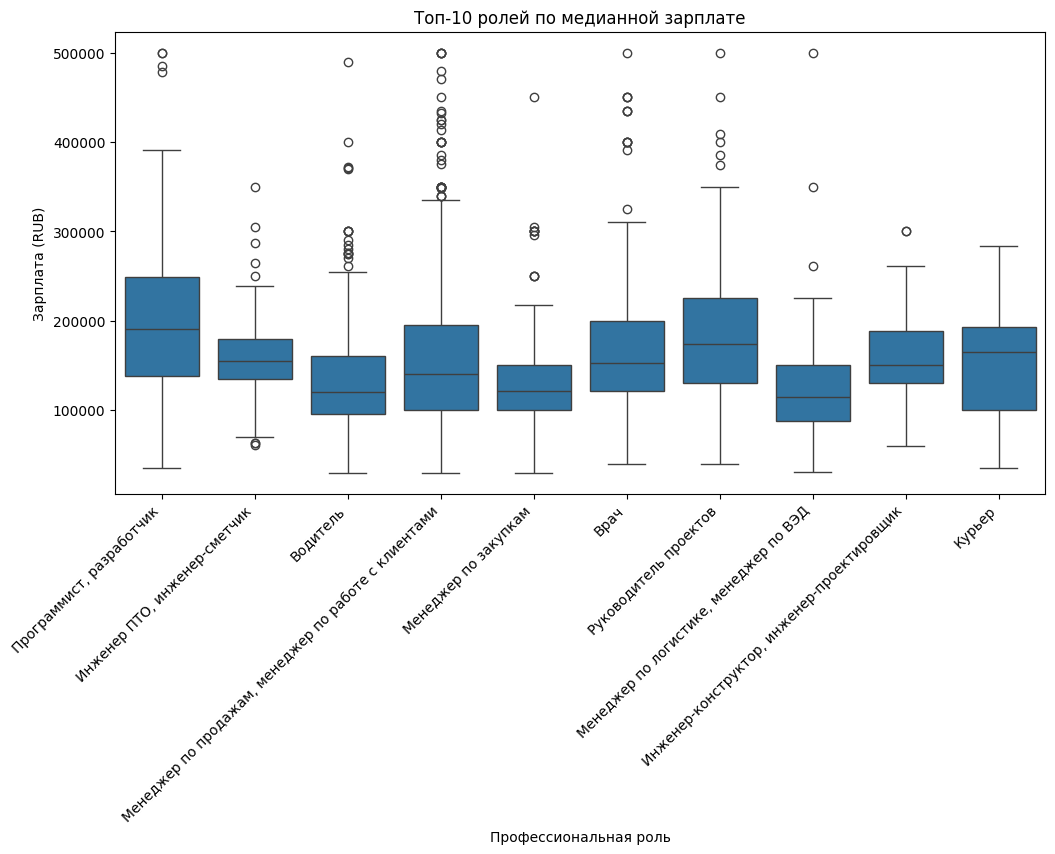

In [29]:
top_roles = (
    df_roles
    .groupby('professional_role_main')['salary_mid']
    .median()
    .sort_values(ascending=False)
    .head(10)
    .index
)

plt.figure(figsize=(12,6))

sns.boxplot(
    data=df_roles[df_roles['professional_role_main'].isin(top_roles)],
    x='professional_role_main',
    y='salary_mid'
)

plt.xticks(rotation=45, ha='right')
plt.title("Топ-10 ролей по медианной зарплате")
plt.xlabel("Профессиональная роль")
plt.ylabel("Зарплата (RUB)")
plt.show()


Анализ заработных плат по профессиональным ролям показал значительную дифференциацию доходов в зависимости от специализации. Наиболее высокий уровень оплаты характерен для IT-специалистов (медиана 190,7 тыс. руб.) и руководителей проектов (174 тыс. руб.).
Относительно высокую медиану продемонстрировали вакансии курьеров (165 тыс. руб.), что может быть связано с высокой интенсивностью труда и концентрацией предложений в крупных городах.
Инженерные и медицинские позиции также характеризуются уровнем оплаты выше среднего.
Административные, сервисные и вспомогательные роли демонстрируют более низкие медианные значения (70–100 тыс. руб.).

In [30]:
df_salary['key_skills'].head(5)

,key_skills
0,"Сварочные работы, Сварщик, Сварка металлоконст..."
1,"Телефонные переговоры, Ведение переписки, Навы..."
2,"Выявление потребностей, Грамотная устная речь,..."
3,None
4,"Электронный документооборот, Внутренняя докуме..."


In [31]:
skills_series = (
    df_salary['key_skills']
    .dropna()
    .str.split(',')
    .explode()
    .str.strip()
)

skills_series.head(10)

,key_skills
0,Сварочные работы
0,Сварщик
0,Сварка металлоконструкций
0,Газовая сварка
0,Ручная дуговая сварка
0,Полуавтоматическая сварка
0,Сварка нержавеющей стали
0,Сварка трубопроводов
0,Сварка алюминия
0,Аргонодуговая сварка


In [32]:
top_skills = skills_series.value_counts().head(20)
top_skills

,count
key_skills,
Деловое общение,1386
Деловая переписка,1067
Организаторские навыки,1033
Активные продажи,1018
Телефонные переговоры,1000
Работа с большим объемом информации,889
Работа в команде,854
Умение работать в коллективе,820
Деловая коммуникация,806


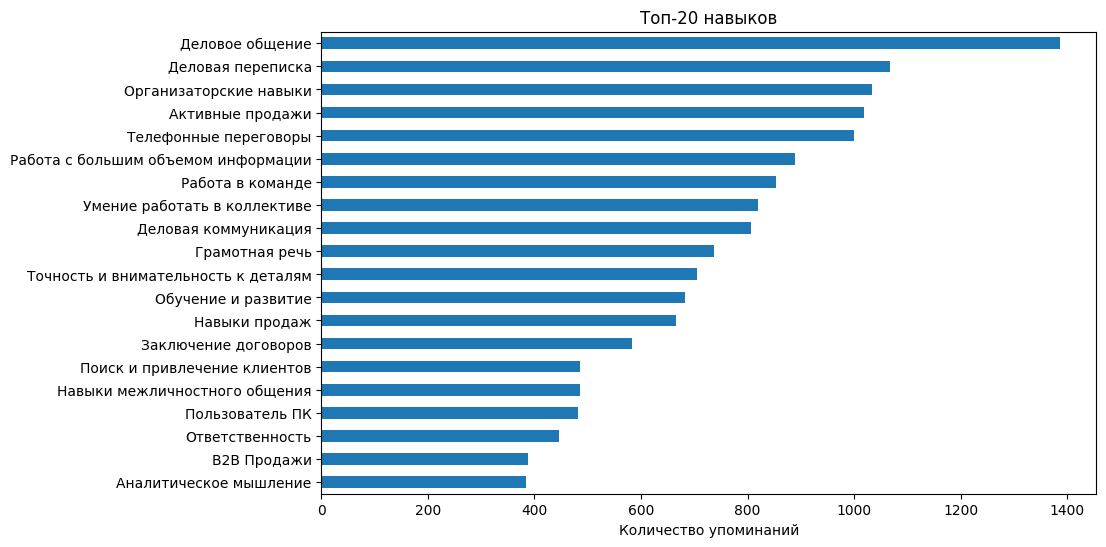

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
top_skills.sort_values().plot(kind='barh')
plt.title("Топ-20 навыков")
plt.xlabel("Количество упоминаний")
plt.ylabel("")
plt.show()


In [34]:
(skills_series == "").sum()

np.int64(7)

In [35]:
skills_series = skills_series[skills_series != ""]

Анализ наиболее часто упоминаемых навыков показал, что в выборке доминируют коммуникативные и организационные компетенции: деловое общение, деловая переписка, навыки продаж и телефонные переговоры.
Это отражает значительную долю вакансий в сфере продаж, клиентского сервиса и административных позиций.
Узкоспециализированные технические навыки встречаются реже в абсолютном выражении, что связано с меньшей численностью соответствующих вакансий.

Следует учитывать, что многие навыки имеют близкий смысл и различаются формулировками (например, «деловое общение» и «деловая коммуникация»), что может влиять на распределение частот.

In [36]:
salary_threshold = df_salary['salary_mid'].quantile(0.75)
salary_threshold

np.float64(152250.0)

In [37]:
df_high = df_salary[df_salary['salary_mid'] >= salary_threshold]
df_low = df_salary[df_salary['salary_mid'] < salary_threshold]

print("High salary:", df_high.shape[0])
print("Low salary:", df_low.shape[0])

High salary: 3551
Low salary: 10580


In [38]:
skills_high = (
    df_high['key_skills']
    .dropna()
    .str.split(',')
    .explode()
    .str.strip()
)

skills_low = (
    df_low['key_skills']
    .dropna()
    .str.split(',')
    .explode()
    .str.strip()
)

In [39]:
top_high = skills_high.value_counts().head(15)
top_low = skills_low.value_counts().head(15)

print("=== High salary ===")
print(top_high)

print("\n=== Low salary ===")
print(top_low)

=== High salary ===
key_skills
Активные продажи                       391
Деловое общение                        361
Телефонные переговоры                  302
Организаторские навыки                 264
Поиск и привлечение клиентов           250
Заключение договоров                   241
Деловая переписка                      239
Деловая коммуникация                   237
Навыки продаж                          194
B2B Продажи                            191
Работа в команде                       180
Работа с большим объемом информации    170
Развитие продаж                        156
Обучение и развитие                    151
Руководство коллективом                146
Name: count, dtype: int64

=== Low salary ===
key_skills
Деловое общение                        1025
Деловая переписка                       828
Организаторские навыки                  769
Работа с большим объемом информации     719
Телефонные переговоры                   698
Умение работать в коллективе            681
Раб

In [40]:
skill_salary = {}

for skill in skills_series.unique():
    mask = df_salary['key_skills'].str.contains(skill, na=False, regex=False)
    if mask.sum() >= 50:
        skill_salary[skill] = df_salary[mask]['salary_mid'].median()

skill_salary_df = pd.Series(skill_salary).sort_values(ascending=False)
skill_salary_df.head(20)

,0
Стратегическое мышление,200000.0
Бюджетирование,186350.0
Стратегия продаж,185000.0
PostgreSQL,180000.0
Бюджет,180000.0
Управленческие навыки,177500.0
Git,177000.0
Управление командой,175000.0
Планирование продаж,174500.0
Управление отношениями с клиентами,174000.0


Частотный анализ навыков отражает структуру выборки и показывает доминирование коммуникативных/продажных компетенций (датасет структурно перегружен данными о вакансиях в продажах).
При этом анализ медианной зарплаты по навыкам выявляет навыки, ассоциированные с более высоким уровнем оплаты (например, PostgreSQL, Git, API), а также управленческие компетенции (стратегия, бюджетирование, управление командой).

In [41]:
skill_salary_diff = {}

overall_median = df_salary['salary_mid'].median()

for skill in skills_series.unique():

    mask = df_salary['key_skills'].str.contains(skill, na=False, regex=False)

    if mask.sum() >= 50:

        median_with = df_salary[mask]['salary_mid'].median()
        median_without = df_salary[~mask]['salary_mid'].median()

        diff = median_with - median_without

        skill_salary_diff[skill] = diff

skill_diff_df = pd.Series(skill_salary_diff).sort_values(ascending=False)

skill_diff_df.head(20)

,0
Стратегическое мышление,90000.0
Бюджетирование,76350.0
Стратегия продаж,75000.0
PostgreSQL,70000.0
Бюджет,70000.0
Управленческие навыки,67500.0
Git,67000.0
Управление командой,65000.0
Планирование продаж,64500.0
Управление отношениями с клиентами,64000.0


In [42]:
numeric_cols = [
    'salary_mid',
    'name_len',
    'desc_len',
    'key_skills_count'
]

corr_matrix = df_salary[numeric_cols].corr()
corr_matrix

,salary_mid,name_len,desc_len,key_skills_count
salary_mid,1.000000,0.070430,0.215526,0.103560
name_len,0.070430,1.000000,0.183356,0.082849
desc_len,0.215526,0.183356,1.000000,0.234415
key_skills_count,0.103560,0.082849,0.234415,1.000000


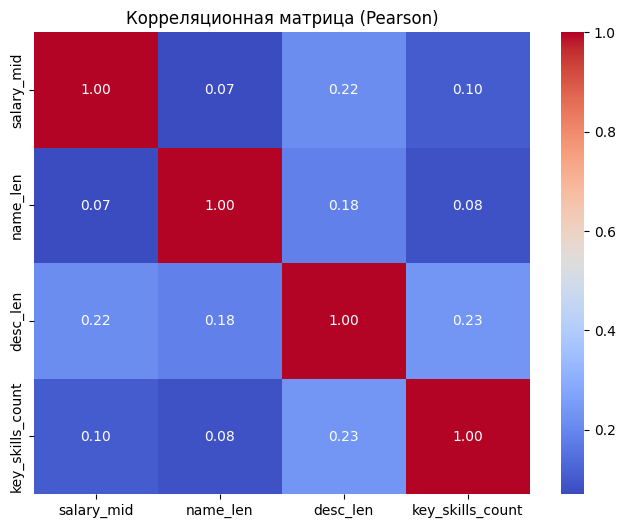

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            fmt='.2f')

plt.title("Корреляционная матрица (Pearson)")
plt.show()

Корреляционный анализ числовых признаков показал отсутствие выраженной линейной связи между зарплатой и длиной текста вакансии либо количеством указанных навыков. Это свидетельствует о том, что уровень оплаты труда определяется прежде всего категориальными характеристиками вакансии (роль, опыт, формат занятости), а не объёмом описания.